In [1]:
from rdkit import Chem
from syba.syba import SybaClassifier
import pandas as pd
from chembl_structure_pipeline import standardize_mol, get_parent_mol

In [2]:
syba = SybaClassifier()
syba.fitDefaultScore()

### ROR-gamma active used to predict new structures

In [3]:
initial_smi = pd.read_excel(r'../model/data/RORgamma_active_compounds.xlsx')
initial_smi = list(initial_smi['SMILES_canonical'])
initial_smi = pd.DataFrame(initial_smi)
print("Initial data description: ")
print(initial_smi.describe())
initial_smi_ = list(initial_smi[0])
corrected_initial_list = [str(smi).split(' ')[0] for smi in initial_smi_]
initial_smi['SMILES_clean'] = corrected_initial_list
all_ROR = initial_smi['SMILES_clean']
print(all_ROR.describe())
print("Examples of initial structures: ")
print(all_ROR[0:3])

Initial data description: 
                                                        0
count                                                  36
unique                                                 35
top     O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...
freq                                                    2
count                                                    36
unique                                                   35
top       O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...
freq                                                      2
Name: SMILES_clean, dtype: object
Examples of initial structures: 
0    CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C
1    CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
2    CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
Name: SMILES_clean, dtype: object


In [4]:
new_set0 = all_ROR.to_list()

In [5]:
dff_15 = pd.DataFrame(new_set0,columns=['SMILES'])
dff_15.shape

(36, 1)

In [6]:
dff_17 = dff_15.drop_duplicates()
dff_17.shape

(35, 1)

In [7]:
dff_17 = dff_17.reset_index()

In [8]:
new_set1 = dff_17['SMILES'].to_list()
new_set1[0]

'CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C'

In [9]:
new_set1 = [Chem.MolToSmiles(get_parent_mol(Chem.MolFromSmiles(smiles), neutralize=True, check_exclusion=True, verbose=False)[0]) for smiles in new_set1]

In [10]:
mols = [Chem.MolFromSmiles(smi) for smi in list(new_set1)]

In [11]:
SYBA_scores = [syba.predict(mol=mol) for mol in mols] 

In [12]:
len(SYBA_scores)

35

In [13]:
data_f = pd.DataFrame(new_set1, columns=['SMILES_clean'])

In [14]:
data_f.head()

,SMILES_clean
0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C
1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...
4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...


In [15]:
data_f['SYBA_score'] = SYBA_scores

In [16]:
data_f.head()

,SMILES_clean,SYBA_score
0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,-33.912427
1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-35.715718
2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-15.914474
3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,-35.349065
4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,-44.987991


<AxesSubplot:>

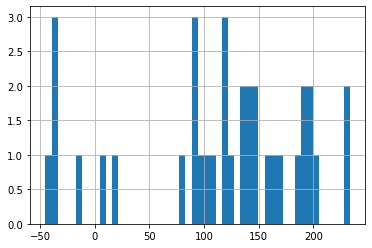

In [17]:
data_f['SYBA_score'].hist(bins=50)

In [18]:
far_below_zero = data_f[data_f['SYBA_score'] < 0]
far_below_zero

,SMILES_clean,SYBA_score
0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,-33.912427
1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-35.715718
2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-15.914474
3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,-35.349065
4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,-44.987991


In [19]:
far_below_zero['SMILES_clean']

0     CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C
1     CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
2     CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C
3    CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...
4    CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...
Name: SMILES_clean, dtype: object

In [20]:
data_f[data_f['SYBA_score'] < 0]

,SMILES_clean,SYBA_score
0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,-33.912427
1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-35.715718
2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-15.914474
3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,-35.349065
4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,-44.987991


### All structures in ROR-gamma active dataset

In [21]:
mols_k = [Chem.MolFromSmiles(smi) for smi in list(new_set1)]

In [22]:
len(mols_k)

35

In [23]:
SYBA_scores_k = [syba.predict(mol=mol) for mol in mols_k] 

In [24]:
data_f_k = pd.DataFrame(new_set1, columns=['SMILES_clean'])

In [25]:
data_f_k['SYBA_score'] = SYBA_scores_k

In [26]:
data_f_k.head()

,SMILES_clean,SYBA_score
0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,-33.912427
1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-35.715718
2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-15.914474
3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,-35.349065
4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,-44.987991


<AxesSubplot:>

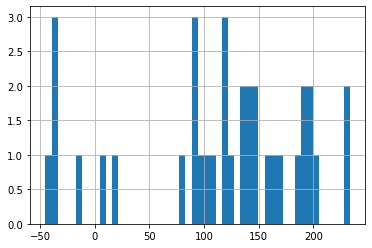

In [27]:
data_f_k['SYBA_score'].hist(bins=50)

In [28]:
far_below_zero_k = data_f_k[data_f_k['SYBA_score'] < -150]
far_below_zero_k

,SMILES_clean,SYBA_score


## Checking how many molecules have SYBA score below 0

In [29]:
ROR_y = data_f_k[data_f_k['SYBA_score'] < 0]

In [30]:
len(ROR_y['SYBA_score'])

5

In [31]:
ROR_y

,SMILES_clean,SYBA_score
0,CC(C)CCCC(C)(O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC21C,-33.912427
1,CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-35.715718
2,CC(CCCC(C)(C)O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,-15.914474
3,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,-35.349065
4,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,-44.987991


### Let's see these structures

In [32]:
from rdkit.Chem import Draw

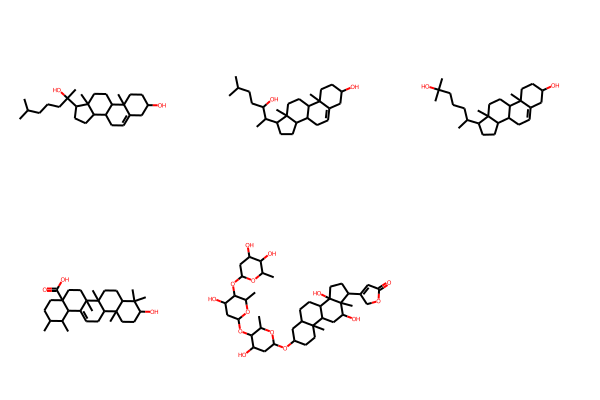

In [33]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in ROR_y['SMILES_clean']], molsPerRow=3)

#### One molecule per time visualization

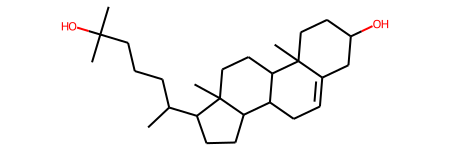

In [34]:
#index taken from file ROR-gamma active
Chem.MolFromSmiles(Kinase_inhibs['SMILES_clean'][2])